In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [2]:
#uploading dataset
bank = pd.read_csv("bank-full.csv",sep=";")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### EDA

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#### Analysis

Text(0.5, 1.0, 'Age count')

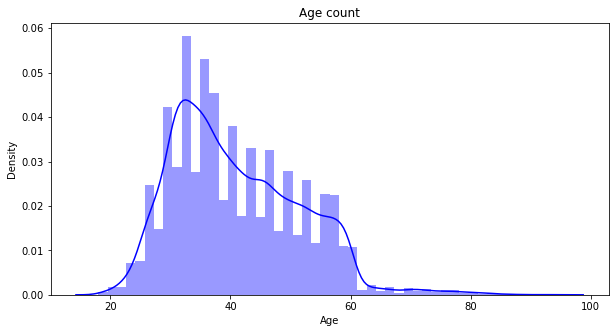

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(bank['age'],color='blue');
plt.xlabel('Age')
plt.title('Age count')

<AxesSubplot:xlabel='y', ylabel='balance'>

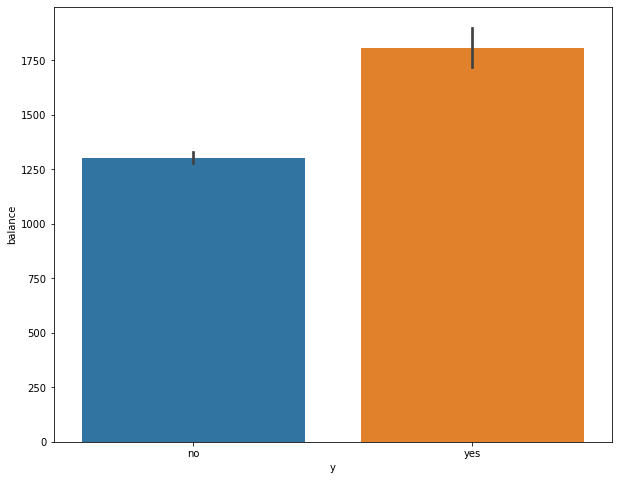

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x='y',y='balance',data=bank)

<AxesSubplot:xlabel='education', ylabel='balance'>

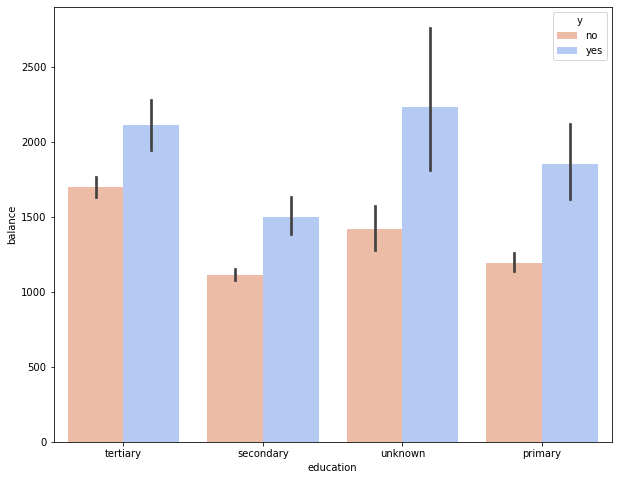

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x='education',y='balance',hue ='y',data=bank,palette='coolwarm_r')

<AxesSubplot:xlabel='marital', ylabel='balance'>

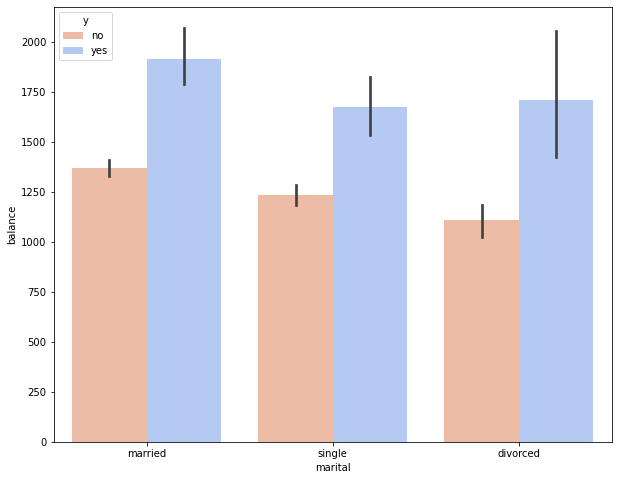

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x='marital',y='balance',hue ='y',data=bank,palette='coolwarm_r')

<AxesSubplot:xlabel='loan', ylabel='balance'>

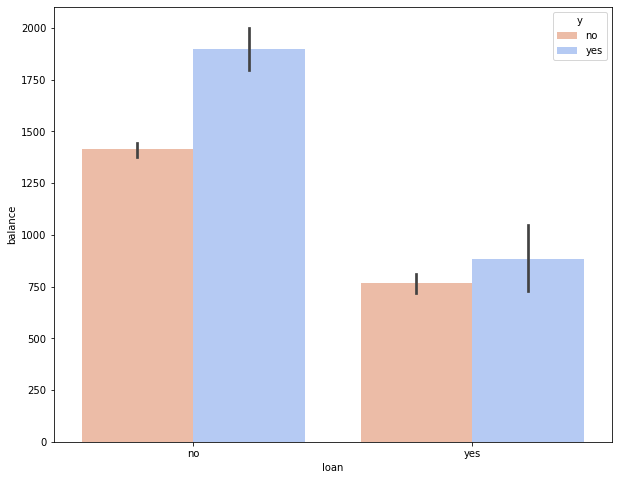

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x='loan',y='balance',hue ='y',data=bank,palette='coolwarm_r')

#### Data preparation

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
bank = pd.read_csv("bank-full.csv",sep=";")
x=bank[['contact','job','marital','education','poutcome','default','housing','loan','y','month']]
x = x.columns

In [13]:
for i in range(len(x)):
    encode = LabelEncoder()
    bank[x[i]] = encode.fit_transform(bank[x[i]])
    
    

In [14]:
bank.pdays.replace((-1),(0),inplace=True)


In [15]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,0,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,0,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,0,0,3,0


In [16]:
'''bank = pd.read_csv("bank-full.csv",sep=";")
#factorizing dataset by replacing 
bank.contact.replace(('cellular','unknown','telephone'),(0,1,2),inplace=True)
bank.job.replace(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
bank.marital.replace(['married', 'single', 'divorced'],[0,1,2],inplace=True)
bank.education.replace(['tertiary', 'secondary', 'unknown', 'primary'],[0,1,2,3],inplace=True)
bank.poutcome.replace(['unknown', 'failure', 'other', 'success'],[0,1,2,3],inplace=True)
bank.default.replace(('yes','no'),(1,0),inplace=True)
bank.housing.replace(('yes','no'),(1,0),inplace=True)
bank.loan.replace(('yes','no'),(1,0),inplace=True)
bank.y.replace(('yes','no'),(1,0),inplace=True)
bank.month.replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
'''

'bank = pd.read_csv("bank-full.csv",sep=";")\n#factorizing dataset by replacing \nbank.contact.replace((\'cellular\',\'unknown\',\'telephone\'),(0,1,2),inplace=True)\nbank.job.replace([\'management\', \'technician\', \'entrepreneur\', \'blue-collar\',\n       \'unknown\', \'retired\', \'admin.\', \'services\', \'self-employed\',\n       \'unemployed\', \'housemaid\', \'student\'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)\nbank.marital.replace([\'married\', \'single\', \'divorced\'],[0,1,2],inplace=True)\nbank.education.replace([\'tertiary\', \'secondary\', \'unknown\', \'primary\'],[0,1,2,3],inplace=True)\nbank.poutcome.replace([\'unknown\', \'failure\', \'other\', \'success\'],[0,1,2,3],inplace=True)\nbank.default.replace((\'yes\',\'no\'),(1,0),inplace=True)\nbank.housing.replace((\'yes\',\'no\'),(1,0),inplace=True)\nbank.loan.replace((\'yes\',\'no\'),(1,0),inplace=True)\nbank.y.replace((\'yes\',\'no\'),(1,0),inplace=True)\nbank.month.replace([\'jan\',\'feb\',\'mar\',\'apr\',\'may\',\

#### model preparation

In [17]:
#seperating X and Y
X = bank.drop("y", axis=1)
Y = bank.y

In [18]:
#train test split
train_x, test_x, train_y, test_y = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42,stratify=Y)

In [19]:
train_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24001,36,9,0,1,0,861,0,0,1,29,1,140,2,0,0,3
43409,24,8,2,1,0,4126,0,0,0,5,0,907,4,185,7,0
20669,44,9,2,1,0,244,1,0,0,12,1,1735,4,0,0,3
18810,48,10,1,1,0,0,0,0,1,31,5,35,11,0,0,3
23130,38,9,1,1,0,257,0,0,0,26,1,57,10,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17958,50,1,1,1,0,917,1,0,0,30,5,58,2,0,0,3
15941,36,0,2,1,0,22,1,0,0,22,5,77,5,0,0,3
16952,45,1,1,1,0,79,1,0,0,25,5,98,1,0,0,3
34781,27,4,2,2,0,2559,1,0,0,6,8,227,1,0,0,3


In [20]:
test_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1392,40,1,1,0,0,640,1,1,2,8,8,347,2,0,0,3
7518,44,9,1,1,0,378,1,0,2,30,8,203,2,0,0,3
12007,31,7,1,1,0,356,1,0,2,20,6,228,5,0,0,3
5536,36,1,1,0,0,655,1,0,2,23,8,153,4,0,0,3
29816,34,7,2,1,0,1921,1,0,0,4,3,61,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12636,26,1,2,1,0,-333,0,1,2,4,5,692,1,0,0,3
13364,49,7,1,1,0,884,1,0,1,8,5,201,3,0,0,3
16102,32,2,1,2,0,964,1,0,0,22,5,370,2,0,0,3
42097,20,8,2,0,0,0,0,0,0,2,9,69,4,182,4,0


In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
train_x, train_y = sm.fit_resample(train_x, train_y)
# test_x, test_y = sm.fit_resample(test_x, test_y)

In [22]:
minmax = MinMaxScaler()
train_x= minmax.fit_transform(train_x)
test_x= minmax.fit_transform(test_x)

In [23]:
train_x

array([[0.23376623, 0.81818182, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.07792208, 0.72727273, 1.        , ..., 0.21239954, 0.02545455,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.37662338, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.81818182, 0.        , ..., 0.19977038, 0.00363636,
        0.66666667],
       [0.14285714, 0.27272727, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [24]:
logit2 = LogisticRegression(penalty='l2' )
logit2.fit(train_x, train_y)

LogisticRegression()

In [25]:
logit2.score(train_x, train_y)

0.852991827660707

In [26]:
logit2.score(test_x, test_y)

0.7572708172066792

In [27]:
pred2 = logit2.predict(train_x)
pred_test2 = logit2.predict(test_x)

In [28]:
print(classification_report(test_y, pred_test2))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      7985
           1       0.30      0.80      0.44      1058

    accuracy                           0.76      9043
   macro avg       0.63      0.78      0.64      9043
weighted avg       0.89      0.76      0.80      9043



In [29]:
pred_prob2 = logit2.predict_proba(test_x)
prob2 = pred_prob2[:, 1]
Logit_roc_score2 = roc_auc_score(test_y, logit2.predict(test_x))
Logit_roc_score2

0.7756406447343968

##### ROC curve

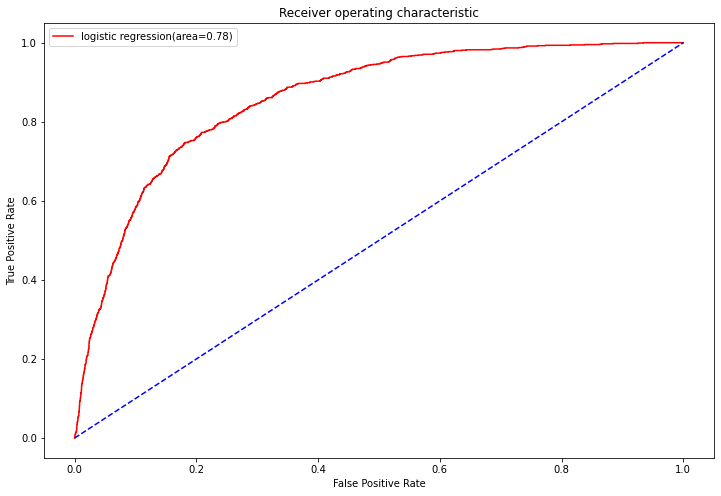

In [30]:
plt.subplots(figsize=[12, 8])
fpr1, tpr1, thresholds1 = roc_curve(test_y, prob2)
plt.plot(fpr1, tpr1, color="red", label="logistic regression(area=%0.2f)"% Logit_roc_score2)
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

#### Hyperparameter tuning using regularization 

In [31]:
logit = LogisticRegression(C=10, penalty='l2',solver='liblinear' ,random_state=42, max_iter=1000)
logit.fit(train_x, train_y)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [32]:
logit.score(train_x, train_y)

0.8544008516767386

In [33]:
logit.score(test_x, test_y)

0.7425633086365144

In [34]:
pred = logit.predict(train_x)
pred_test = logit.predict(test_x)

#### confusion matrix and model evaluation

In [35]:
confusion_matrix(y_pred=pred_test,y_true=test_y)

array([[5839, 2146],
       [ 182,  876]])

In [36]:
print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      7985
           1       0.29      0.83      0.43      1058

    accuracy                           0.74      9043
   macro avg       0.63      0.78      0.63      9043
weighted avg       0.89      0.74      0.79      9043



In [37]:
print(classification_report(train_y, pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     31937
           1       0.84      0.88      0.86     31937

    accuracy                           0.85     63874
   macro avg       0.86      0.85      0.85     63874
weighted avg       0.86      0.85      0.85     63874



In [38]:
pred_prob = logit.predict_proba(test_x)
prob = pred_prob[:, 1]
Logit_roc_score = roc_auc_score(test_y, logit.predict(test_x))
Logit_roc_score

0.7796117010510017

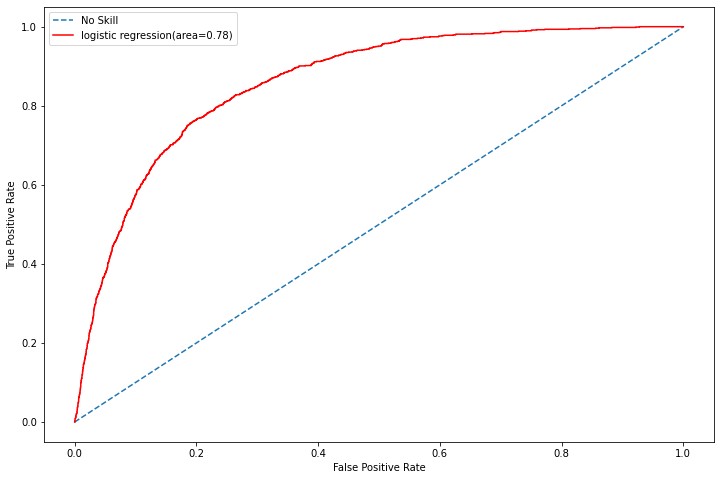

In [39]:
plt.subplots(figsize=[12, 8])
fpr, tpr, thresholds = roc_curve(test_y, prob)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, color="red",label="logistic regression(area=%0.2f)"% Logit_roc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### elasticnet 

In [40]:
logit3 = LogisticRegression(C=10, penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=10000)
logit3.fit(train_x, train_y)

LogisticRegression(C=10, l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   solver='saga')

In [41]:
logit3.score(train_x, train_y)

0.8545260982559414

In [42]:
logit3.score(test_x, test_y)

0.7399093221276125

### Here we have found that the logit1 is giving us the best result for both train and test dataset so we will go with logit1 model


#### evaluation

In [43]:
gmeans = np.sqrt(tpr1 * (1-fpr1))
gmeans

array([0.        , 0.        , 0.03074185, ..., 0.25580442, 0.2559254 ,
       0.        ])

In [44]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans[ix]))

Best Threshold=0.563630, G-Mean=0.782


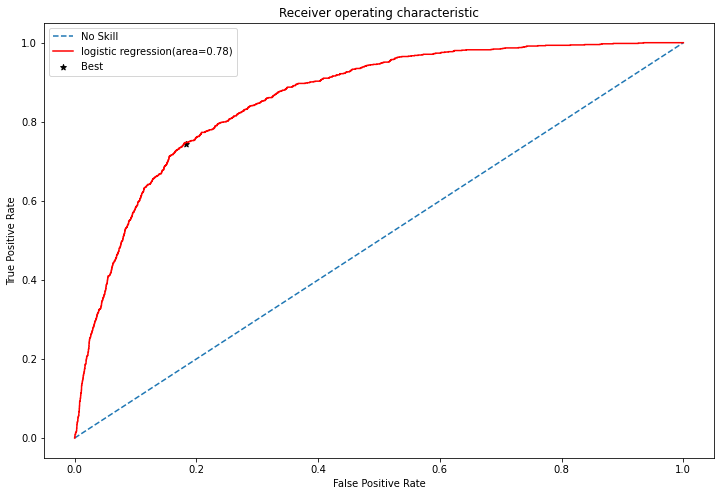

In [45]:
plt.subplots(figsize=[12, 8])
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr1, tpr1, color="red", label="logistic regression(area=%0.2f)"% Logit_roc_score2)
plt.scatter(fpr[ix], tpr[ix], marker='*', color='black', label='Best')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()